In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('loan.csv')

data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [5]:
data[['date_issued', 'date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

In [6]:
data['date_issued'] = pd.to_datetime(data['date_issued'])
data['date_last_payment'] = pd.to_datetime(data['date_last_payment'])

In [7]:
data['month'] = data['date_issued'].dt.month
data['year'] = data['date_issued'].dt.year

In [8]:
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,month,year
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,6,2013
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,5,2014
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,10,2013
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,8,2015
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN,7,2014


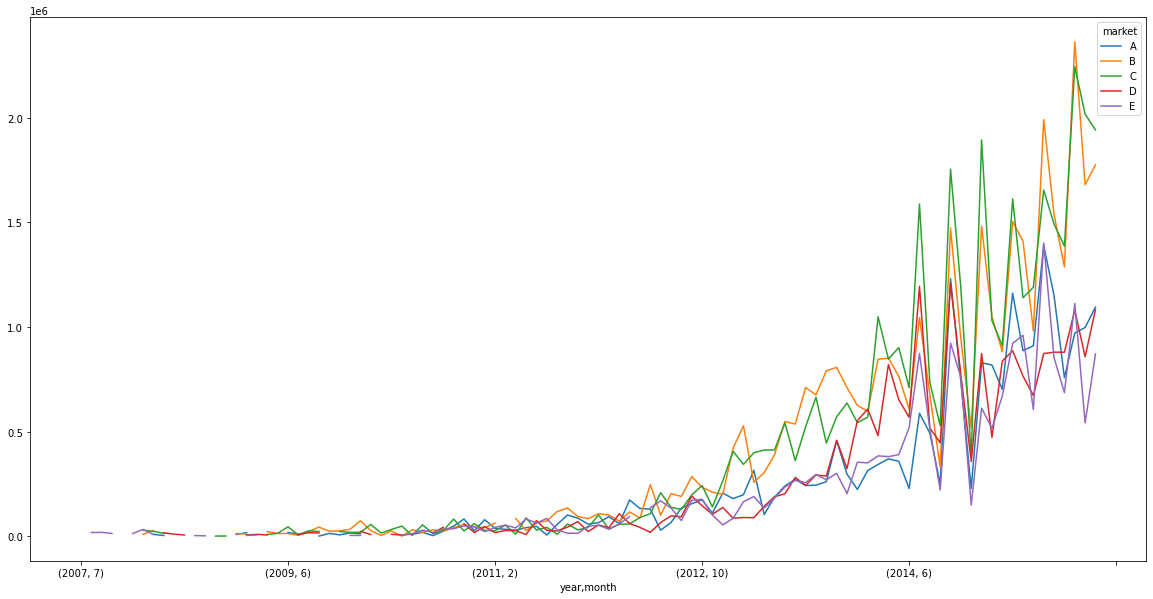

In [12]:
# Let's see how much money has been disbursed
# over the years to the different risk
# markets (grade variable).
# unstack --> separate the markets

fig = data.groupby(['year', 'month', 'market'])['disbursed_amount'].sum().unstack().plot(figsize=(20,10))

This toy finance company seems to have increased the amount of money lent from 2012 onwards. The tendency indicates that they will continue to grow. In addition, we can see that their major business comes from lending money to C and B-grade borrowers.

A grades are given to the lowest-risk borrowers; these are the borrowers who are most likely to repay their loans because they are in a better financial situation. Borrowers within this grade are charged lower interest rates.

Riskier borrowers represent the D and E grades. Borrowers who are in a slightly tighter financial situation or who do not have enough financial history to make a reliable credit assessment. They are typically charged higher rates, as the business, and therefore the investors, take a higher risk when lending them money.